In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart['sex'] = heart['sex'].apply(lambda s: 'M' if s == 1 else 'F')
heart['DEATH_EVENT'] = heart['DEATH_EVENT'].apply(lambda s: 'deceased' if s==1 else 'alive')
heart.to_csv('heart_failure_clinical_records_dataset_new.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,deceased
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,deceased
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,deceased
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,deceased
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,deceased


In [34]:
death = heart[heart['DEATH_EVENT'] == 'deceased']
alive = heart[heart['DEATH_EVENT'] == 'alive']

## Identifying differences in different columns between deceased and alive individuals.

In [4]:
# heart.groupby('DEATH_EVENT')[['platelets','creatinine_phosphokinase', 'serum_creatinine']].describe().transpose().round(2)

#### There may be a significant difference in the creatinine levels of people who are alive and those who have passed away.

# Plot


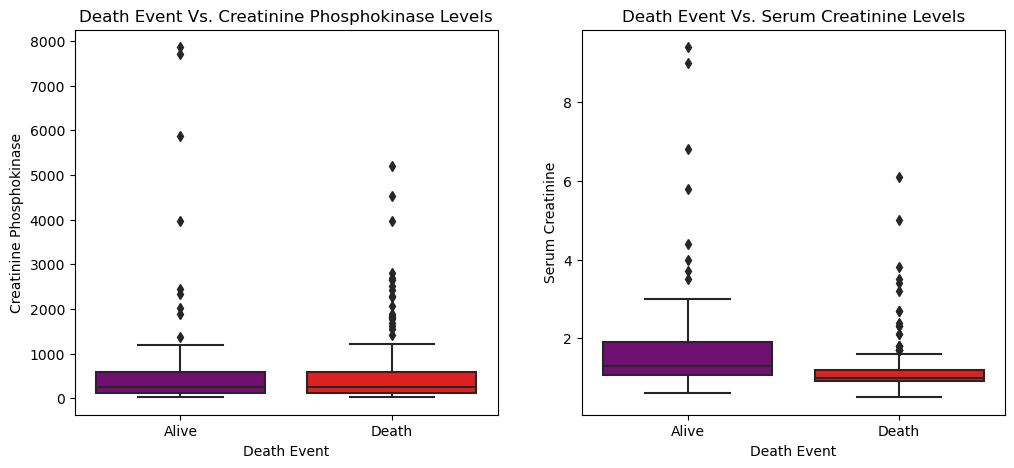

In [35]:
# Lets see how the boxplot differ


# creatinine phosphokinase
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=heart, x=heart.DEATH_EVENT, y=heart.creatinine_phosphokinase, palette=['Purple', 'Red'])
ax1.set_xticklabels(['Alive', 'Death'])
ax1.set_ylabel('Creatinine Phosphokinase')
ax1.set_xlabel('Death Event')
ax1.set_title('Death Event Vs. Creatinine Phosphokinase Levels')

# serum_creatinine
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=heart, x=heart.DEATH_EVENT, y=heart.serum_creatinine, palette=['Purple', 'Red'])
ax2.set_xticklabels(['Alive', 'Death'])
ax2.set_ylabel('Serum Creatinine')
ax2.set_xlabel('Death Event')
ax2.set_title('Death Event Vs. Serum Creatinine Levels')
plt.show()

#### It appears that the serum creatine levels in individuals who have passed away are higher than those who are still alive. However, there does not seem to be a significant difference in creatinine phosphokinase levels. It is possible that the presence of outliers is causing the mean to be higher for deceased individuals. To obtain a clearer representation of the data, we need to view the box plot without the outliers.

In [37]:
# Creating a new data frame with by exculding outliers
def removeOutlier(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    return data[(data[col] > lower_range) & (data[col] < upper_range)]


In [38]:
creatinine_phos = removeOutlier(heart, 'creatinine_phosphokinase')
serum_creatinine = removeOutlier(heart, 'serum_creatinine')

# creatinine_phos_alive = creatinine_phos[creatinine_phos['DEATH_EVENT'] == 0]
# creatinine_phos_Death = creatinine_phos[creatinine_phos['DEATH_EVENT'] == 1]

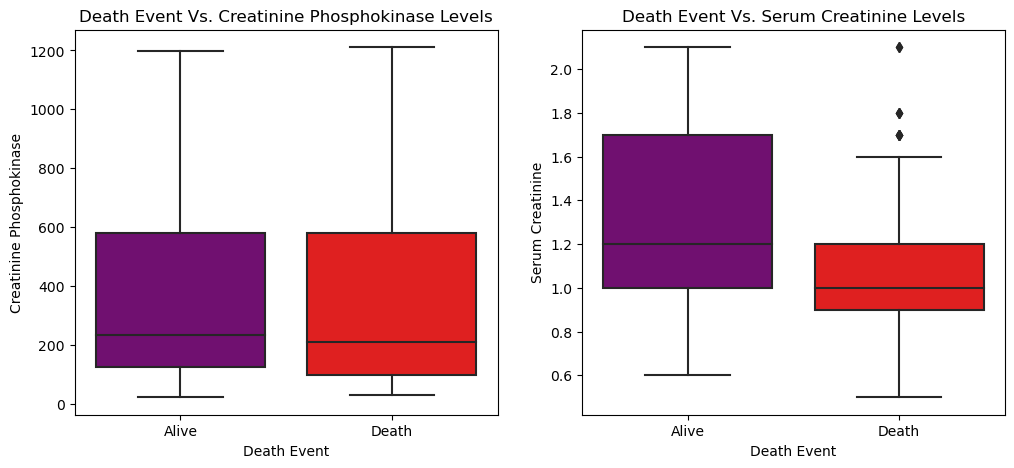

In [39]:
# creatinine phosphokinase
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=creatinine_phos, x=creatinine_phos.DEATH_EVENT, y=creatinine_phos.creatinine_phosphokinase,
            palette=['Purple', 'Red'])
ax1.set_xticklabels(['Alive', 'Death'])
ax1.set_ylabel('Creatinine Phosphokinase')
ax1.set_xlabel('Death Event')
ax1.set_title('Death Event Vs. Creatinine Phosphokinase Levels')

# serum_creatinine
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=serum_creatinine, x=serum_creatinine.DEATH_EVENT, y=serum_creatinine.serum_creatinine,
           palette=['Purple', 'Red'])
ax2.set_xticklabels(['Alive', 'Death'])
ax2.set_ylabel('Serum Creatinine')
ax2.set_xlabel('Death Event')
ax2.set_title('Death Event Vs. Serum Creatinine Levels')
plt.show()

#### In general, there might be a noticeable variation in serum creatinine levels on average, so I plan to run a test using the R programming language. Although there doesn't seem to be any difference in creatinine phosphokinase, we will still investigate it. I'll also assess the variance to get a better understanding of the data.

## Proportions

In [40]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,deceased
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,deceased
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,deceased
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,deceased
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,deceased


In [41]:
heart.groupby('DEATH_EVENT')[['anaemia', 'diabetes', 'smoking']].mean().transpose()

DEATH_EVENT,alive,deceased
anaemia,0.408867,0.479167
diabetes,0.418719,0.416667
smoking,0.325123,0.312500


#### There is a clear and significant difference in the proportion of anemia between individuals who are alive and those who are dead. However, there is negligible disparity among individuals with diabetes or who smoke.

## Regression Analysis

In [54]:
corr = heart[['age', 'creatinine_phosphokinase',
              'serum_creatinine', 'ejection_fraction',
              'platelets', 'serum_sodium', 'time']].corr()
corr.style.background_gradient(cmap='viridis')

,age,creatinine_phosphokinase,serum_creatinine,ejection_fraction,platelets,serum_sodium,time
age,1.000000,-0.081584,0.159187,0.060098,-0.052354,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.016408,-0.044080,0.024463,0.059550,-0.009346
serum_creatinine,0.159187,-0.016408,1.000000,-0.011302,-0.041198,-0.189095,-0.149315
ejection_fraction,0.060098,-0.044080,-0.011302,1.000000,0.072177,0.175902,0.041729
platelets,-0.052354,0.024463,-0.041198,0.072177,1.000000,0.062125,0.010514
serum_sodium,-0.045966,0.059550,-0.189095,0.175902,0.062125,1.000000,0.087640
time,-0.224068,-0.009346,-0.149315,0.041729,0.010514,0.087640,1.000000


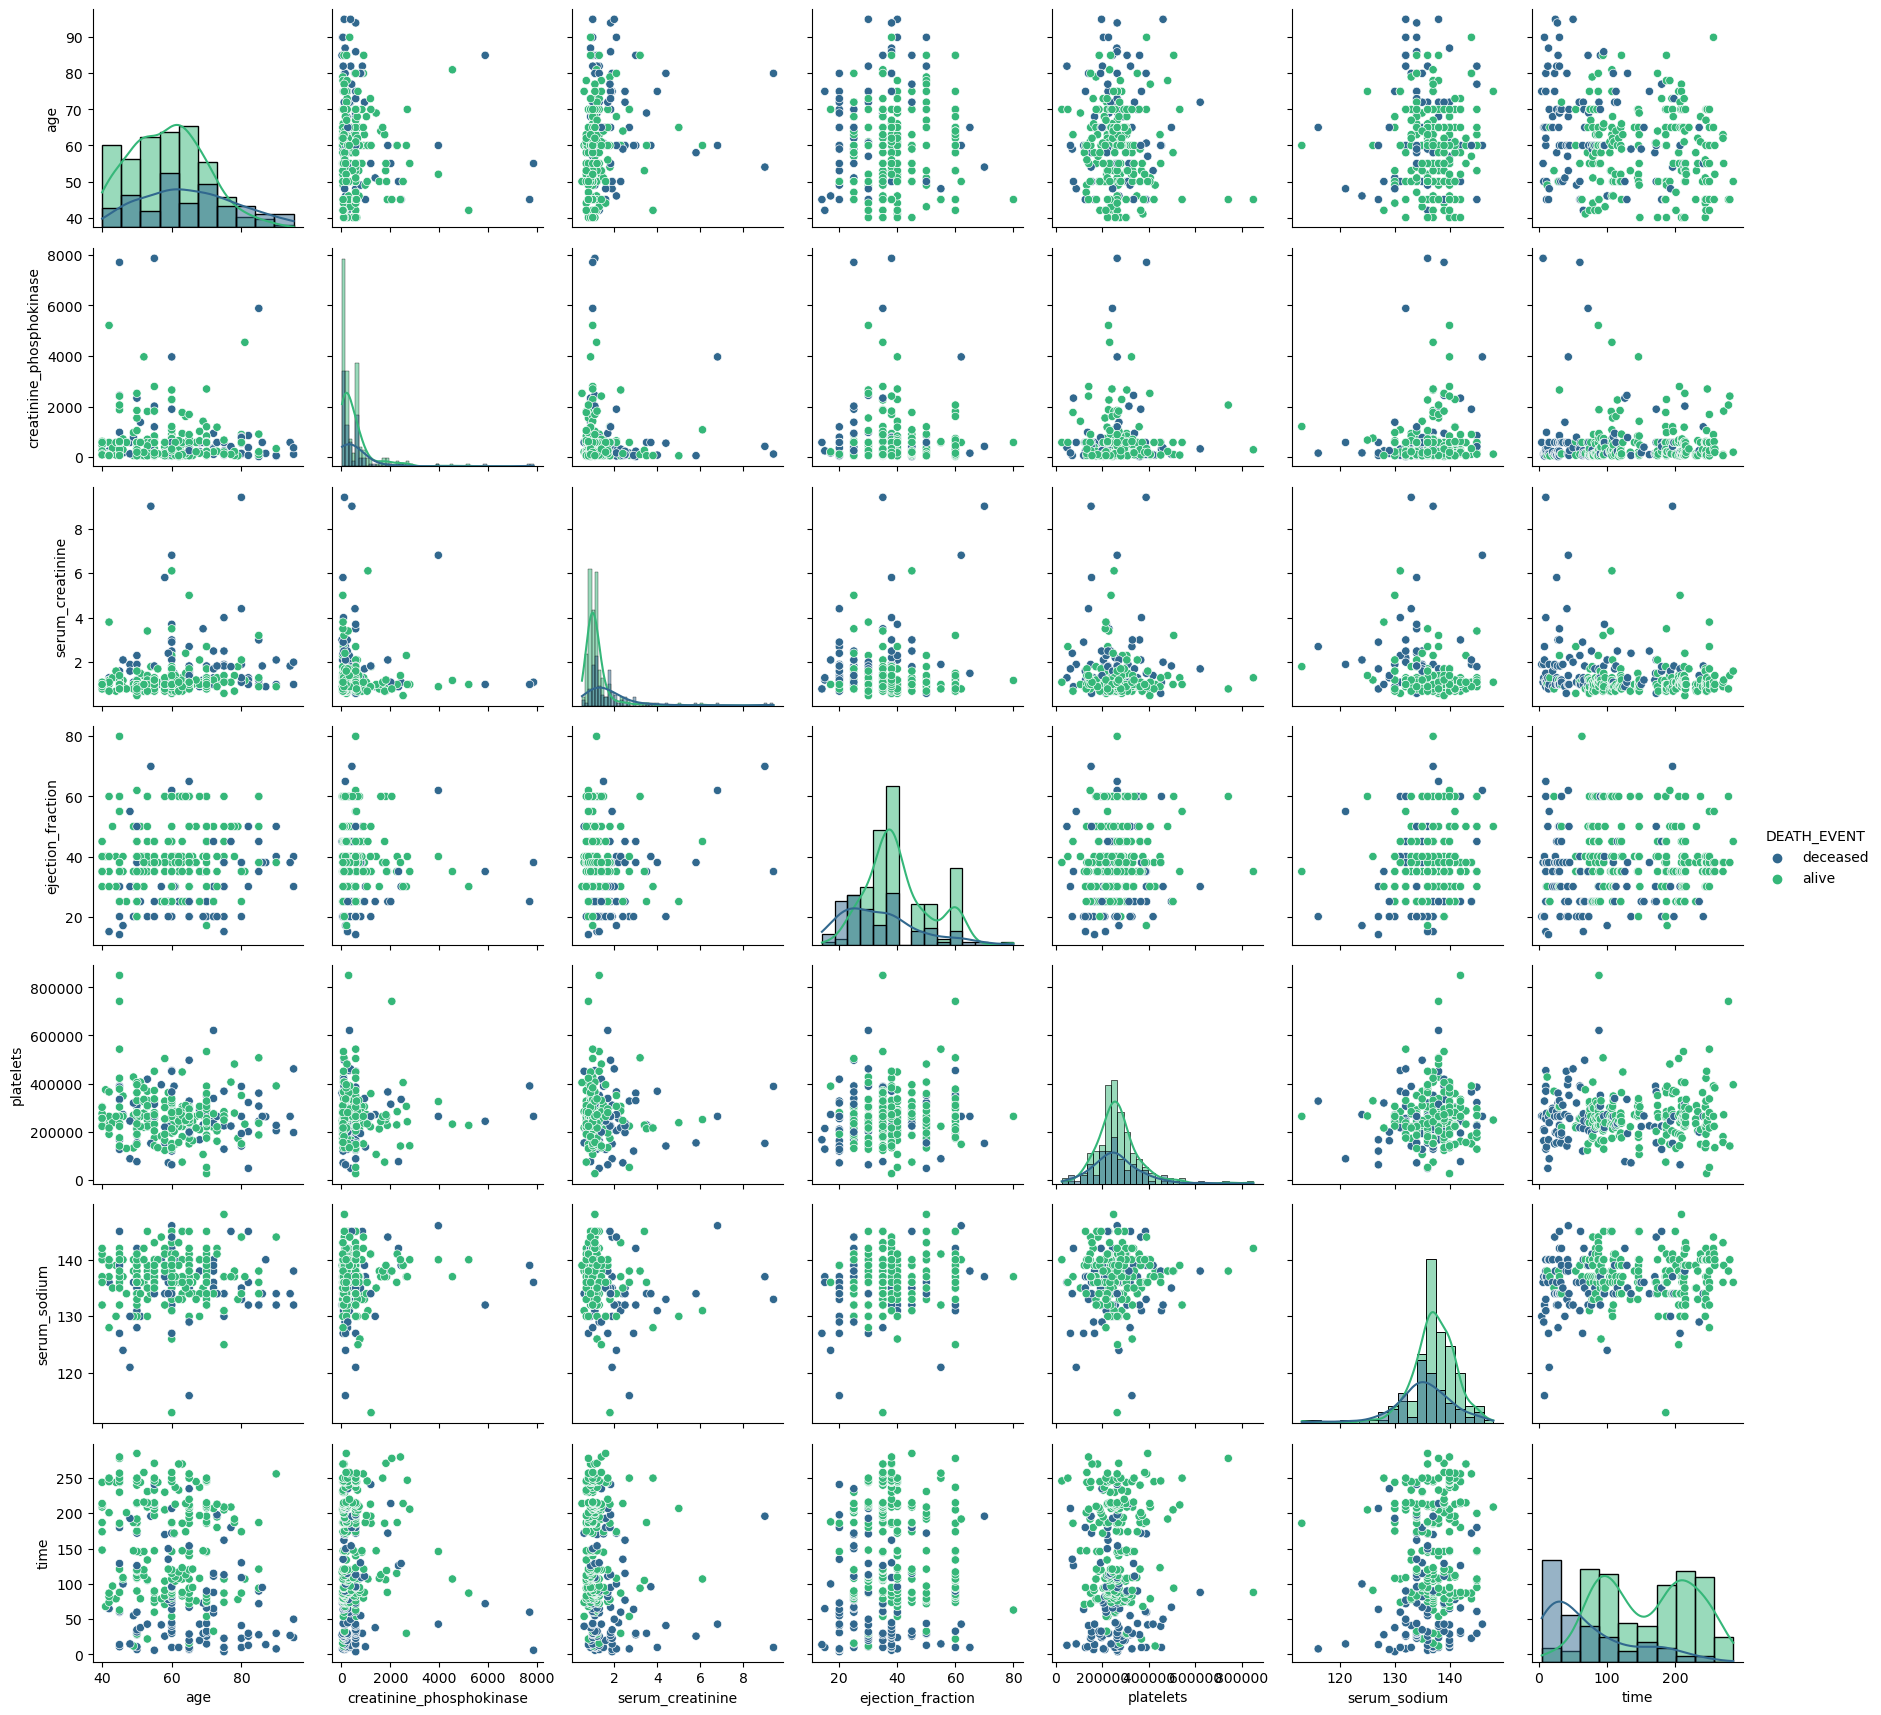

In [53]:
g = sns.PairGrid(heart[['age', 'creatinine_phosphokinase', 'serum_creatinine',
                        'ejection_fraction', 'platelets',
                        'serum_sodium', 'time', 'sex', 'DEATH_EVENT']],
                 hue='DEATH_EVENT', palette='viridis')

g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()